# Day 12 In-Class Assignment: Linear regression and polynomial fitting
---

### <p style="text-align: right;"> &#9989; Krizma Nagi</p>

#### <p style="text-align: right;"> &#9989; Lexie, Javi, Lelouch, Dan Ka, Oliver</p>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Moore%27s_Law_Transistor_Count_1971-2018.png" alt="Moore" border="0" width=800px>

Data from https://en.wikipedia.org/wiki/Moore%27s_law

## Fitting data and making predictions

Moore's law is often used to describe the ever-increasing power of computational hardware.  But what does it describe exactly?  

Moore's law is not a law, but an observation, dating back to the 1960's when Gordon Moore predicted that the number of transistors on a microprocessor would double every year.  This was later revised slightly in the 70s to a doubling every two years.

In this assignment we're going to examine Moore's Law using a dataset of transistor counts, number of cores, and clock speeds of CPUs released from the 1970s to 2019.

The **learning goals** of the assignment are to:

* Practice fitting data using the functions provided to you by the NumPy python package.
* Using your model and fit to the data, explore how well your model can predict the future.

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

---
## Part 1: Loading and viewing the data

Download the zip file `microprocessor-trend-data-master.zip` from the course website and unzip it.  Today we will use the files in the folder `microprocessor-trend-data-master/48yrs`.  Make sure the following files are accessible to this notebook by copying them to your working directory, or by uploading them to JupyterHub:  `transistors.dat`, `frequency.dat` and `cores.dat`.

"Transistors" is the number of transistors on a chip, which we can use to examine Moore's law directly.

"Frequency" is the clock speed of the processor in MHz.

"Cores" is the number of cores on a chip.

&#9989;&nbsp; **Task**: Look at these files in a text editor (e.g. TextEdit on Mac or Notepad on Windows) to examine their structure.  Load the data into numpy arrays.  You should have **six** numpy arrays after loading: `core_date`, `core_data`, `freq_date`, `freq_data`, `trans_date`, `trans_data`.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

core_date, core_data = np.loadtxt("cores.dat", usecols = [0,1], unpack=True)
freq_date, freq_data = np.loadtxt("frequency.dat", usecols = [0,1], unpack=True)
trans_date, trans_data = np.loadtxt("transistors.dat", usecols = [0,1], unpack=True)

&#9989;&nbsp; **Task**: Below, plot each of these datasets vs time using three separate plots, with a linear scale for the y-axis.  Use symbols instead of lines and be sure to label the axes!

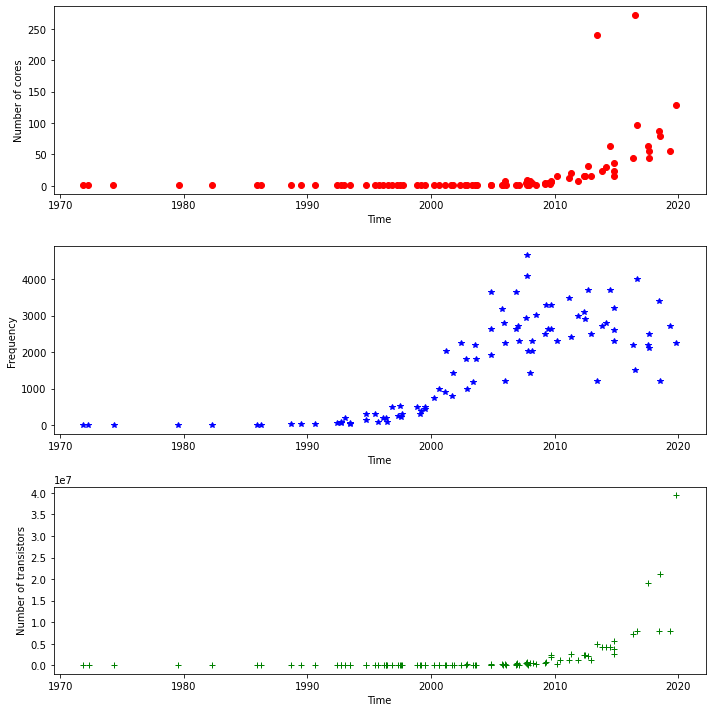

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(core_date, core_data, 'ro')
plt.ylabel('Number of cores')
plt.xlabel('Time')
plt.yscale('linear')

plt.subplot(3,1,2)
plt.plot(freq_date, freq_data, 'b*')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.yscale('linear')

plt.subplot(3,1,3)
plt.plot(trans_date, trans_data, 'g+')
plt.ylabel('Number of transistors')
plt.xlabel('Time')
plt.yscale('linear')

plt.tight_layout()

&#9989;&nbsp; **Task**: What do you observe from this data?

The data sets create relatively exponentialy curves.

&#9989;&nbsp; **Task**: Plot these again using a log scale for the y axis.

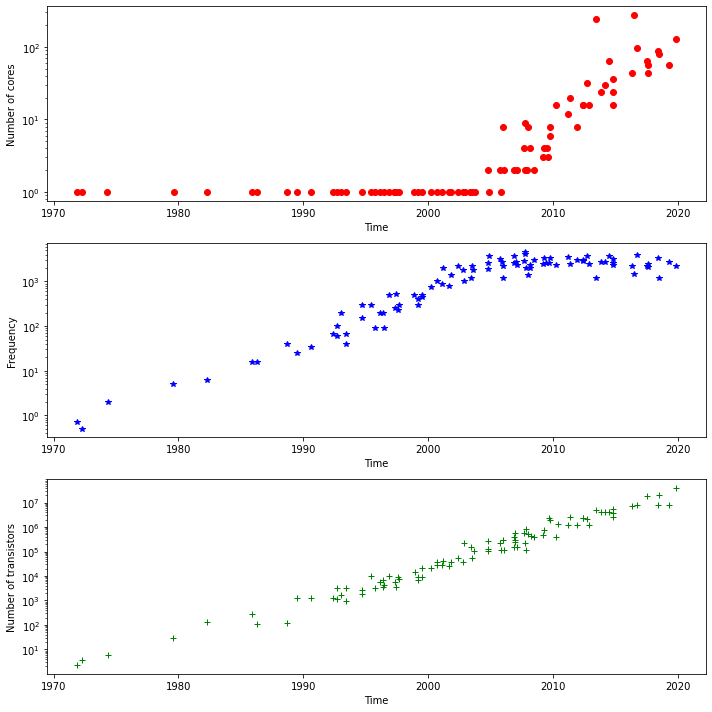

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(core_date, core_data, 'ro')
plt.ylabel('Number of cores')
plt.xlabel('Time')
plt.yscale('log')

plt.subplot(3,1,2)
plt.plot(freq_date, freq_data, 'b*')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.yscale('log')

plt.subplot(3,1,3)
plt.plot(trans_date, trans_data, 'g+')
plt.ylabel('Number of transistors')
plt.xlabel('Time')
plt.yscale('log')

plt.tight_layout()

&#9989;&nbsp; **Task**: What are some additional observations you can make that were hidden in the linear-scale plots?

The data shows more of a trend than when the y scale was linear. The second and third graphs have more of a uniform shape to them as well.

### &#128721; STOP
##### Make sure everyone in the group has finished up to this point. 
#####  Check in with an instructor before you move to the next session!

---
## Part 2: Linear Regression
### 2.1 Measuring goodness of fit

As a first pass, your goal is to produce a fit to the data using a linear model using `np.polyfit` and `np.poly1d`. You should be familiar with these from today's pre-class assignment.

&#9989;&nbsp; **Task**: Separately, create a linear fit to each of the three datasets using `np.polyfit`. **Make a plot of the data along with the best fit line**. What are the parameters for your best fit? **Print out those parameter values**. 

[ 1.85429128e+00 -3.69617479e+03]
[ 9.46570106e+01 -1.87976392e+05]
[ 2.34934912e+05 -4.68727621e+08]


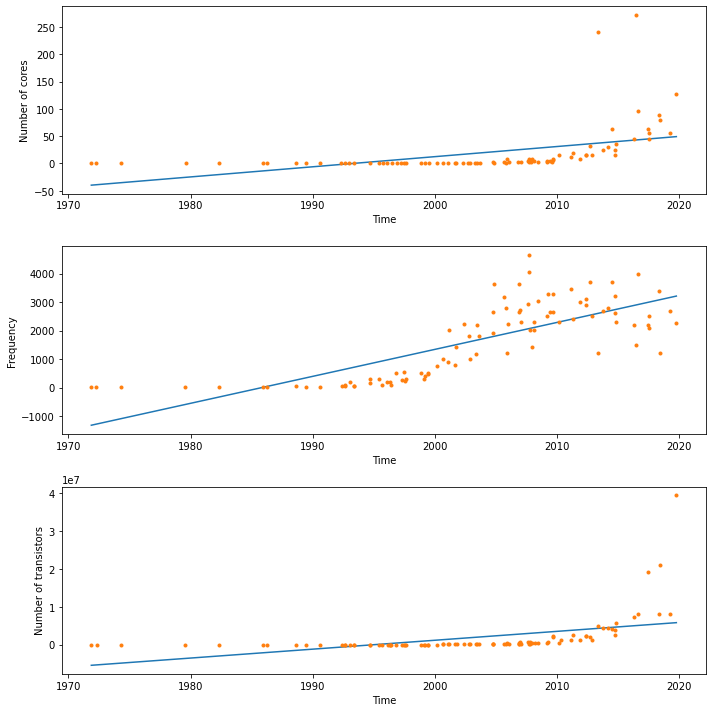

In [39]:
core_parameters = np.polyfit(core_date,core_data,1)
print(core_parameters)
core_function = np.poly1d(core_parameters)

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(core_date, core_function(core_date))
plt.plot(core_date, core_data, ".")
plt.ylabel('Number of cores')
plt.xlabel('Time')


freq_parameters = np.polyfit(freq_date,freq_data,1)
print(freq_parameters)
freq_function = np.poly1d(freq_parameters)

plt.subplot(3,1,2)
plt.plot(freq_date, freq_function(freq_date))
plt.plot(freq_date, freq_data, ".")
plt.ylabel('Frequency')
plt.xlabel('Time')


trans_parameters = np.polyfit(trans_date,trans_data,1)
print(trans_parameters)
trans_function = np.poly1d(trans_parameters)

plt.subplot(3,1,3)
plt.plot(trans_date, trans_function(trans_date))
plt.plot(trans_date, trans_data, ".")
plt.ylabel('Number of transistors')
plt.xlabel('Time')

plt.tight_layout()

---
### 2.2 Measuring goodness of fit

Now we're going to write a function that takes in our data, as well as our fit model, and returns the **root mean squared error**, or RMSE.  The RMSE is defined as:

\begin{equation}
RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2}
\end{equation}

where $y_i$ is a given data point, and $\hat{y_i}$ is the value of that point predicted by the model.

**A perfect model would have an RMSE of 0, since it would predict each data point with zero error.**

&#9989;&nbsp; **Task**: Complete the following function that computes the RMSE given a model and a set of data points.  **Note: the "model" is a function, such as that returned by `np.poly1d`.**

In [41]:
def rmse(x_points,y_points,model):
    """
    A function for computing the RMSE of a model, based on a set of points.
    
    Input:
    x_points  : array
                A set of x points (e.g. times) that correspond to the data points, y

    y_points  : array
                A set of y points (e.g. transistor counts) that correspond to the times
                x
                
    model     : function
                A model that takes in an x value and returns a y value
                
                
    Output:
    rmse      : float
                The root mean squared error of the model, computed using x and y
    """
    
    nx = len(x_points)
    ny = len(y_points)
    
    if nx != ny:
        print("Error! x and y must have the same length!")
        
    sum_sq = 0
    for i in range(len(x_points)):
        sum_sq += (y_points[i] - model(x_points[i]))**2
        
    rmse = np.sqrt(sum_sq/nx)
    
    return rmse

&#9989;&nbsp; **Task**: Now test out the function using the linear model below:

In [52]:
x = np.array([0,1,5,10,22])
y = np.array([-3,7,40,77,132])
params = np.polyfit(x, y, 1)
my_model = np.poly1d(params)

print("The RMSE of this model is:",rmse(x,y,my_model))
print("The RMSE of this model should be:",7.362174877644251)

The RMSE of this model is: 7.362174877644251
The RMSE of this model should be: 7.362174877644251


---
### 2.3 Higher order fitting

&#9989;&nbsp; **Task**: Now let's fit the transistor data with higher order polynomial functions (e.g. second order ($n=2$), third order ($n=3$), etc), using $n = 1,2,3,...,10$. For each order, compute the RMSE.  ***Then make a plot of RMSE vs. n.***

In [65]:
rmse_list = []
for i in range(1,11):
    parameters_i = np.polyfit(trans_date, trans_data, i)
    trans_function = np.poly1d(parameters_i)
    rmse_i = rmse(trans_date, trans_data, trans_function)
    rmse_list.append(rmse_i)

C:\Users\krizm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\krizm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\krizm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\krizm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\krizm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [66]:
rmse_list

[4556008.823444758,
 3815236.3887509904,
 3072303.148746565,
 2682301.494292991,
 2500988.082407113,
 2500320.118080629,
 2499650.1390011613,
 2498984.729074025,
 2498321.6213462534,
 2429816.6931609493]

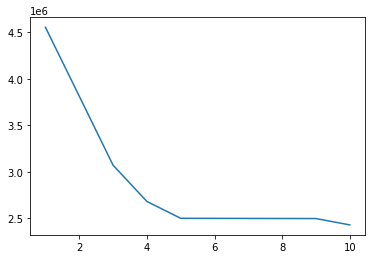

In [68]:
nlist = []

for i in range(1,11):
    nlist.append(i)
    
plt.plot(nlist, rmse_list)

&#9989;&nbsp; **Task**: How does increasing the order of fit change the RMSE?

It initially decreases, but then hits a wall, and the rate that it decreases at slows down.

&#9989;&nbsp; **Task**: Plot the 10th order fit against the transistor data on both the linear and log scales.

C:\Users\krizm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\krizm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


[ 1.05502879e-15 -6.70618621e-12  7.94705765e-09  2.02260694e-05
 -1.25629367e-02 -8.93475887e+01 -5.69940214e+04  3.19412744e+08
  5.29420348e+11 -1.71669523e+15  1.06529645e+18]
[ 1.05502879e-15 -6.70618621e-12  7.94705765e-09  2.02260694e-05
 -1.25629367e-02 -8.93475887e+01 -5.69940214e+04  3.19412744e+08
  5.29420348e+11 -1.71669523e+15  1.06529645e+18]


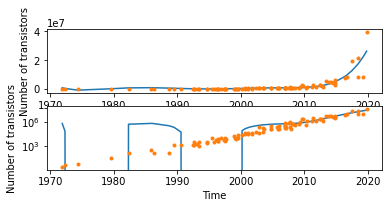

In [51]:
trans_parameters = np.polyfit(trans_date,trans_data,10)
print(trans_parameters)
trans_function = np.poly1d(trans_parameters)

plt.subplot(3,1,1)
plt.plot(trans_date, trans_function(trans_date))
plt.plot(trans_date, trans_data, ".")
plt.ylabel('Number of transistors')
plt.xlabel('Time')

trans_parameters = np.polyfit(trans_date,trans_data,10)
print(trans_parameters)
trans_function = np.poly1d(trans_parameters)

plt.subplot(3,1,2)
plt.plot(trans_date, trans_function(trans_date))
plt.plot(trans_date, trans_data, ".")
plt.ylabel('Number of transistors')
plt.xlabel('Time')
plt.yscale("log")

&#9989;&nbsp; **Task**: How does the 10-th order fit perform in the early years?  For the late years?  How do you think this fit could be improved?

In the 10th order fit, the regression does not match the graphed data in a logarithmic scale, but it does fit the data well when in a linear scale.

### &#128721; STOP
##### Make sure everyone in the group has finished up to this point. 
#####  Check in with an instructor before you move to the next session!

---
## Part 3: Predicting a new law for the number of processors (Time permitting)

As you saw above, there is another trend emerging for the number of processors that a given CPU has.  Before 2005, all processors were single-core.

&#9989;&nbsp; **Task**: Make a mask to create a subset of the cores data for years 2005 or later.

In [ ]:
# Put your code here

&#9989;&nbsp; **Task**: Fit this to functions with orders ranging from 1 to 5.  Record the RMSE for each model.

In [ ]:
# your code here

&#9989;&nbsp; **Task**: Plot the data, as well as the fit, for each of the five models.  Be sure to include a legend!

In [ ]:
# Put your code here

&#9989;&nbsp; **Task**: Make another masked dataset that also excludes the two datapoints with values greater than 200.

In [ ]:
# Put your code here

&#9989;&nbsp; **Task**: Give this the same treatment: fit to orders 1 through 5, save the models in a list, then loop through and use each model to plot a fit curve.

In [ ]:
# Put your code here

&#9989;&nbsp; **Task**: How did getting rid of those two points affect the fitted curves?

/ your answer here /

### &#128721; STOP
##### Make sure everyone in the group has finished up to this point. 
##### Check in with an instructor before you leave class!

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2021,  Michigan State University Board of Trustees